<a href="https://colab.research.google.com/github/dxt42250/Autoencoders/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
235/235 [==============================] - 5s 16ms/step - loss: 0.6946 - accuracy: 6.5000e-04 - val_loss: 0.6945 - val_accuracy: 7.0000e-04
Epoch 2/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6944 - accuracy: 6.0000e-04 - val_loss: 0.6943 - val_accuracy: 7.0000e-04
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6942 - accuracy: 5.8333e-04 - val_loss: 0.6941 - val_accuracy: 7.0000e-04
Epoch 4/5
235/235 [==============================] - 4s 16ms/step - loss: 0.6940 - accuracy: 5.6667e-04 - val_loss: 0.6939 - val_accuracy: 7.0000e-04
Epoch 5/5
1/1 [==============================] - 0s 53ms/step


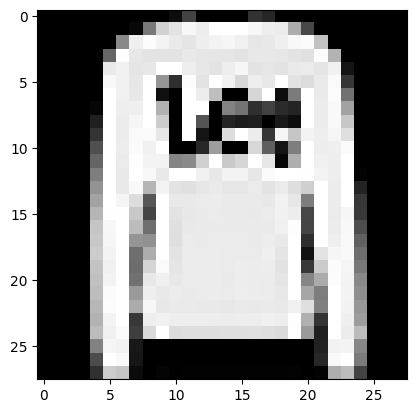

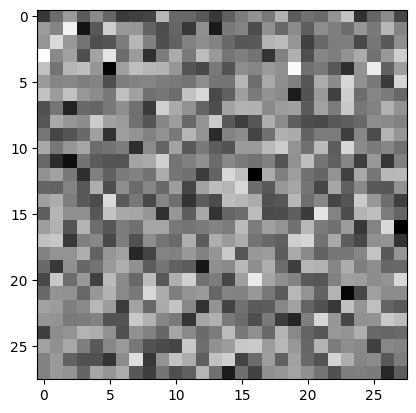

In [34]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# prediction
prediction = autoencoder.predict(x_test[[6],:])

from matplotlib import pyplot as plt
# Input Image
plt.imshow(x_test[1].reshape(28,28))
plt.show()
# Reconstructed Image
plt.imshow(prediction[0].reshape(28,28))
plt.show()

Epoch 1/5
235/235 [==============================] - 4s 14ms/step - loss: 0.6945 - accuracy: 0.0021 - val_loss: 0.6943 - val_accuracy: 0.0025
Epoch 2/5
235/235 [==============================] - 4s 15ms/step - loss: 0.6942 - accuracy: 0.0022 - val_loss: 0.6941 - val_accuracy: 0.0025
Epoch 3/5
235/235 [==============================] - 4s 15ms/step - loss: 0.6939 - accuracy: 0.0020 - val_loss: 0.6938 - val_accuracy: 0.0025
Epoch 4/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6937 - accuracy: 0.0020 - val_loss: 0.6936 - val_accuracy: 0.0024
Epoch 5/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6934 - accuracy: 0.0019 - val_loss: 0.6933 - val_accuracy: 0.0024
Epoch 1/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6950 - accuracy: 0.0017 - val_loss: 0.6949 - val_accuracy: 0.0013
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.6947 - accuracy: 0.0016 - val_loss: 0.6946 - val_accuracy: 0.0013
Epoc

1/1 [==============================] - 0s 64ms/step


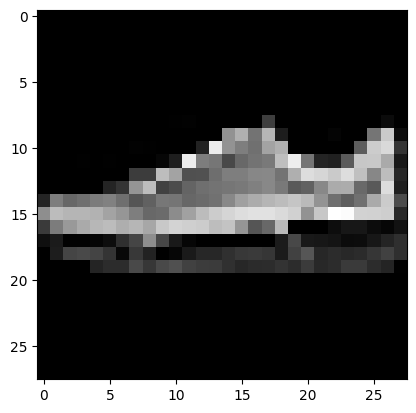

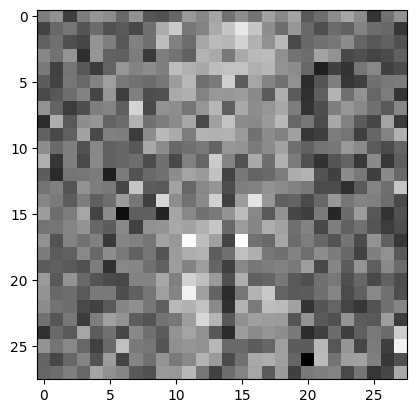

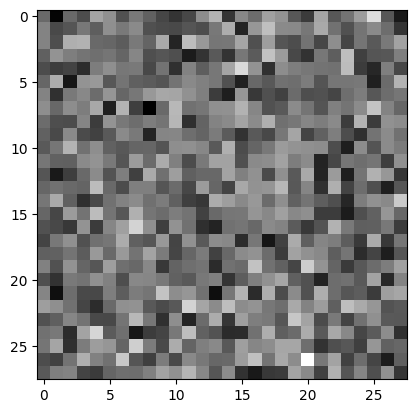

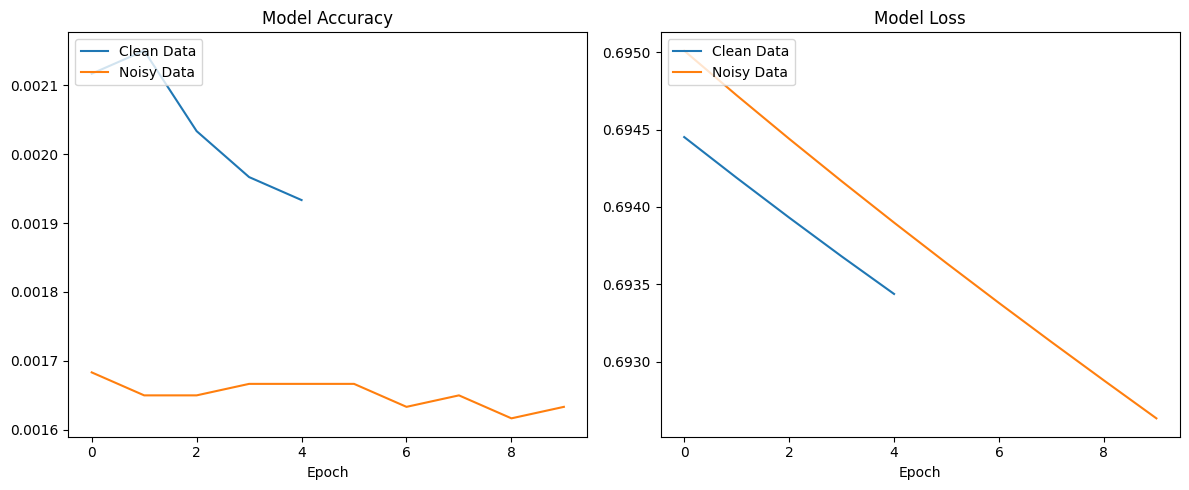

In [32]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Fit the model on clean data
history_clean = autoencoder.fit(x_train, x_train,
                                epochs=5,
                                batch_size=256,
                                shuffle=True,
                                validation_data=(x_test, x_test))

# Introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Fit the model on noisy data
history_noisy = autoencoder.fit(x_train_noisy, x_train,
                                epochs=10,
                                batch_size=256,
                                shuffle=True,
                                validation_data=(x_test_noisy, x_test_noisy))

# Prediction
prediction1 = autoencoder.predict(x_test_noisy[[15], :])

# Input Image
plt.imshow(x_test[9].reshape(28, 28))
plt.show()
# After applying noise to data
plt.imshow(x_test_noisy[15].reshape(28, 28))
plt.show()

# Reconstructed Image
plt.imshow(prediction1[0].reshape(28, 28))
plt.show()

# Plot the loss and accuracy for both training processes
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(history_clean.history['accuracy'])
plt.plot(history_noisy.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.legend(['Clean Data', 'Noisy Data'], loc='upper left')

plt.subplot(122)
plt.plot(history_clean.history['loss'])
plt.plot(history_noisy.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.legend(['Clean Data', 'Noisy Data'], loc='upper left')

plt.tight_layout()
plt.show()
